In [ ]:
!pip install darts

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.utils.statistics import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess


El modelo ARMA(p,q) se define generalmente como:

$$
X_t = c + \varepsilon_t + \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}
$$

Donde $ \varepsilon_t $ es un ruido blanco.

Cuando implementamos este modelo usando arma\_generate\_sample, los coeficientes AR y MA se definen de la siguiente manera:

$$
AR = [1, -\phi_1, -\phi_2, \ldots, -\phi_p]
$$

$$
MA = [1, \theta_1, \theta_2, \ldots, \theta_q]
$$



In [59]:
np.random.seed(123)

# Parámetros del modelo ARMA(2,1)
ar_params = np.array([1, -0.9, 0.2])
ma_params = np.array([1, 0.9])

# Crear el proceso ARMA
arma_process = ArmaProcess(ar_params, ma_params)

# Simular la serie de tiempo
simulated_data = arma_process.generate_sample(nsample=1000)
simulated_series = TimeSeries.from_values(simulated_data)


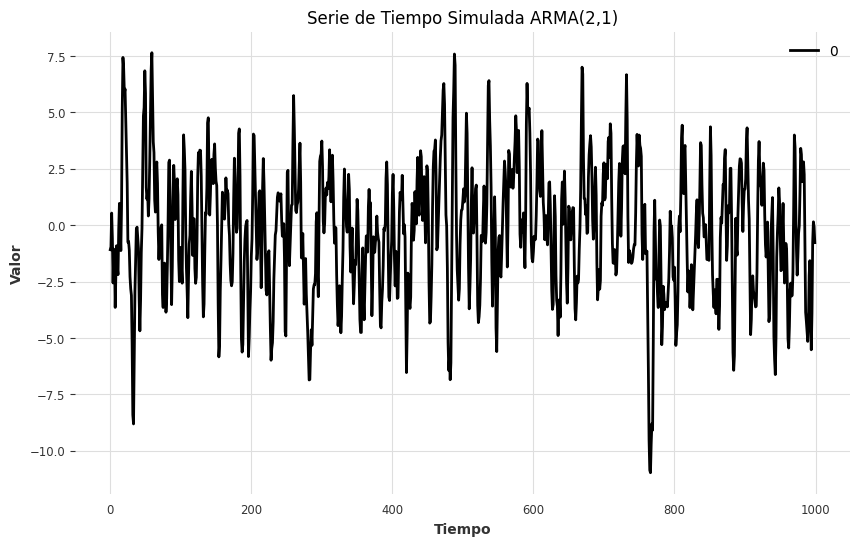

In [60]:
# Graficar la serie de tiempo simulada
plt.figure(figsize=(10, 6))
simulated_series.plot()
plt.title("Serie de Tiempo Simulada ARMA(2,1)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.show()


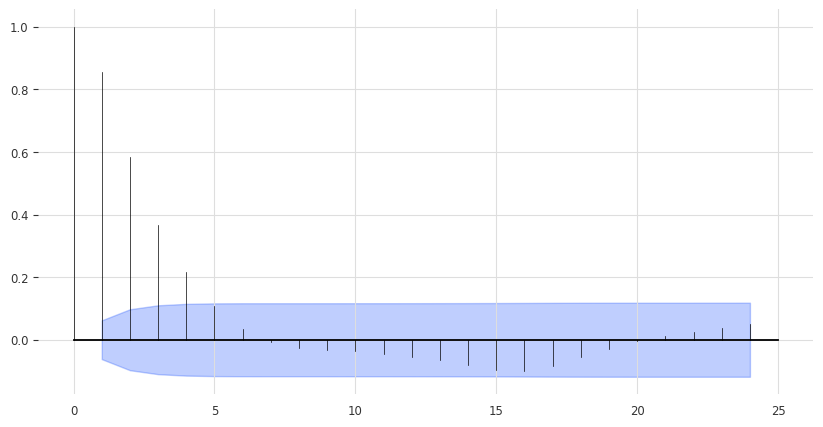

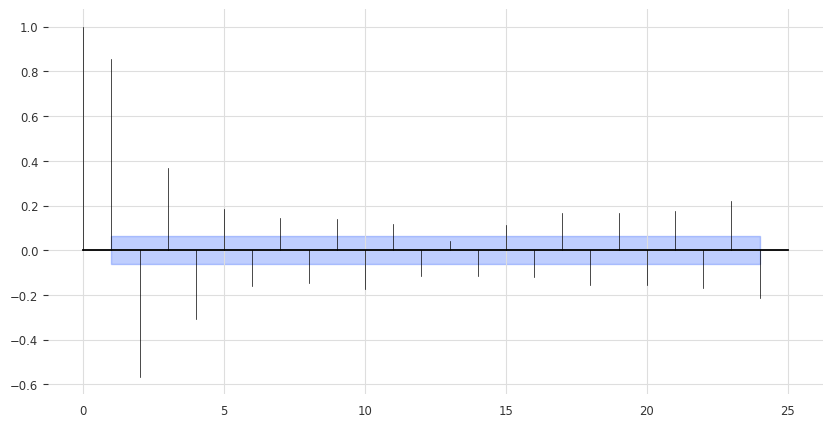

In [61]:
# Graficar ACF
plot_acf(simulated_series)

# Graficar PACF
plot_pacf(simulated_series)
